<h2>3<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Γενετικοί Αλγόριθμοι</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα εξοικειωθείτε με την χρήση των γενετικών αλγορίθμων και την επιλογή των παραμέτρων τους. Επιπλέον, θα αναπτύξετε ένα γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με τους αλγόριθμους εντοπισμού κοινοτήτων που εφαρμόστηκαν στην 2<sup>η</sup> εργαστηριακή άσκηση.</p>

In [48]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import random

### Άσκηση 1: Εξοικείωση με Γενετικούς Αλγόριθμους

#### Πρόβλημα ONEMAX

<p style=text-align:justify>Βρείτε την δυαδική ακολουθία $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$. Αναλύστε την επίδραση του μεγέθους του πληθυσμού, της πιθανότητας διασταύρωσης (crossover) και της πιθανότητας μετάλλαξης (mutation) στην ποιότητα της λύσης (πόσο κοντά είναι στην προφανή βέλτιστη λύση) που προκύπτει από το γενετικό αλγόριθμο. Συγκεκριμένα, μεταβάλλετε τον πληθυσμό από $10$ ως $100$ χρωμοσώματα με βήμα $10$,την πιθανότητα διασταύρωσης από $0.3$ ως $0.9$ με βήμα $0.1$ και την πιθανότητα μετάλλαξης από $0.01$ ως $0.2$ με βήμα $0.01$. Εξετάστε την ποιότητα της λύσης του γενετικού αλγορίθμου καθώς αλλάζετε τις παραμέτρους. Ελιτισμό μπορείτε να χρησιμοποιήσετε αν το επιθυμείτε.</p>

In [2]:
def create_population(size):
    # Create the initial population
    genes_per_chromosome = 20
    pop_size = (size, genes_per_chromosome) # The population will have *size* chromosomes, with *genes_per_chromosome* genes.
    population = np.random.randint(0, 2, pop_size)
    return population

def find_fitness(chromosomes):
    fitness = np.empty([chromosomes.shape[0], 1])
    for i in range(chromosomes.shape[0]):
        fitness[i] = np.sum(chromosomes[i])
    return fitness

def proportional_selection(fitness):
    # Select chromosomes to pass to next population proportionally to their fitness
    total = np.sum(fitness)
    normalized = np.array([f/total for f in fitness])
    normalized = np.sort(normalized)
    cum_sum = np.array(normalized).cumsum()
    rand = np.random.random_sample()
    cum_sum = np.append(cum_sum, rand)
    veriable = np.sort(cum_sum)
    return np.where(veriable == rand)

def crossover(parent_0, parent_1):
    # Apply crossover to population
    pos = np.random.randint(0, len(parent_0))
    offspring_0 = parent_0[:pos]
    offspring_0 = np.append(offspring_0, parent_1[pos:])
    offspring_1 = parent_1[:pos]
    offspring_1 = np.append(offspring_1, parent_0[pos:])
    return (offspring_0, offspring_1)

def mutation(mutant, mut_prob):
    # Apply mutation to population
    for pos in range(len(mutant)):
        rand_mut = np.random.random_sample()
        if (rand_mut < mut_prob):
            mutant[pos] = 1 if mutant[pos] == 0 else 0
    return mutant

def genetic_algorithm(population, cross_prob, mut_prob, generations=10):
    # Main genetic algorithm
    pop = create_population(population)
    for g in range(generations):
        fitness = find_fitness(pop)
        next_generation = np.empty_like(pop)
        for i in range(0, population, 2):
            parent_1 = pop[proportional_selection(fitness)]
            parent_2 = pop[proportional_selection(fitness)]
            rand_cross = np.random.random_sample()
            
            if (rand_cross < cross_prob):
                off_1, off_2 = crossover(parent_1, parent_2)
            
                next_generation[i] = mutation(off_1, mut_prob)
                next_generation[i+1] = mutation(off_2, mut_prob)
            
            else:
                next_generation[i] = parent_1
                next_generation[i+1] = parent_2
        
        pop = next_generation
    fitn = find_fitness(pop)
    return fitn.max()

In [4]:
best = 0
for pop in range(10, 110, 10):
    for cross_prob in np.arange(0.3, 1, 0.1):
        for mut_prob in np.arange(0.01, 0.21, 0.01):
            res = genetic_algorithm(pop, cross_prob, mut_prob)
            if res > best:
                best = res
                print("Population: %d, crossover probability: %f, mutation probability: %f, Result: %d" % (pop, cross_prob, mut_prob, res)) 

Population: 10, crossover probability: 0.300000, mutation probability: 0.010000, Result: 15
Population: 10, crossover probability: 0.300000, mutation probability: 0.170000, Result: 16
Population: 10, crossover probability: 0.400000, mutation probability: 0.070000, Result: 18
Population: 10, crossover probability: 0.800000, mutation probability: 0.100000, Result: 20


<p>Όπως βλέπουμε, καθώς το μέγιστο που προσπαθούμε να βρούμε είναι αρκετά απλό, όπως και οι τρόποι που κάνουμε mutate και crossover, την καλύτερη λύση την έχουμε με μεγάλο πληθυσμό και πιθανότητες μετάλλαξης και μεσαία πιθανότητα crossover. Αυτό συμβαίνει γιατί ο πληθισμός φτάνει από μόνος του αρκετά γρήγορα σε σύγκλιση, με αποτέλεσμα οι γενιές να έχουν μικρές διαφορές μεταξύ τους. Αυτός είναι και ο ρόλος της μετάλλαξης, να εξασφαλίζει ότι δεν θα συγκλίνουμε σε τοπικά μέγιστα.</p>

### Άσκηση 2: Εντοπισμός Κοινοτήτων σε Γράφους Κοινωνικών Δικτύων με Χρήση Γενετικών Αλγορίθμων

<p style=text-align:justify>Στην παρούσα άσκηση θα αναπτύξετε κώδικα για εντοπισμό κοινοτήτων σε γράφους δικτύων με χρήση γενετικών αλγορίθμων. Ακολούθως θα εφαρμόσετε το γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με εκείνο των αλγορίθμων της δεύτερης εργαστηριακής άσκησης χρησιμοποιώντας τη μετρική modularity.</p>

##### Αναπαράσταση υποψήφιων λύσεων (χρωμοσωμάτων)
<p style=text-align:justify>Κάθε χρωμόσωμα $b_{i,t}$ του πληθυσμού τη χρονική στιγμή $t$ είναι ένα διάνυσμα με μήκος ίσο με το πλήθος των κόμβων του δικτύου, $n$. Αν $b_{i,t}(j)=d$ τότε οι κόμβοι $j,d$ ανήκουν στην ίδια κοινότητα. Επιπλέον για να ισχύει $b_{i,t}(j)=d$ , οι κόμβοι $j,d$ θα πρέπει να συνδέονται στην αρχική τοπολογία. Τότε, βρίσκοντας τις συνδεδεμένες συνιστώσες του χρωμοσώματος $b_{i,t}$ , προκύπτουν οι κοινότητες του δικτύου.</p>

##### Αρχικοποίηση
<p style=text-align:justify>Η αρχική γενιά του πληθυσμού θα πρέπει να αποτελείται από χρωμοσώματα τα οποία θα είναι τυχαία επιλεγμένα και διορθωμένα ώστε ο αριθμός που υπάρχει σε κάθε θέση να είναι γείτονας του αντίστοιχου κόμβου. (Αν δεν ισχύει θα πρέπει να αντικατασταθεί από ένα γείτονα του αντίστοιχου κόμβου.) Θεωρείστε πληθυσμό $300$ χρωμοσωμάτων.</p>

##### Συνάρτηση Fitness
<p style=text-align:justify>Η συνάρτηση fitness υπολογίζεται όπως στις διαφάνειες 28 και 29 της αντίστοιχης διάλεξης του μαθήματος. Προσοχή για κάθε συνιστώσα (component) του γράφου θα πρέπει να βρίσκετε τον αντίστοιχο υπογράφο.</p>

##### Επιλογή (Selection)
<p style=text-align:justify>Η επιλογή χρωμοσωμάτων από μία γενιά του πληθυσμού για την κατασκευή της επόμενης γενιάς γίνεται με τη μέθοδο της ρουλέτας (διαφάνειες μαθήματος και αλγόριθμος). Τροποποιήστε τον παραπάνω αλγόριθμο ώστε να εφαρμόσετε και ελιτισμό, δηλαδή τα $x$ πρώτα χρωμοσώματα της νέας γενιάς θα είναι εκείνα τα χρωμοσώματα της προηγούμενης γενιάς που έχουν επιτύχει τη μέγιστη τιμή της συνάρτησης fitness.</p>

##### Διασταύρωση (Crossover)
<p style=text-align:justify>Η διασταύρωση πραγματοποιείται όπως περιγράφεται στον αλγόριθμο, μεταξύ διαδοχικών χρωμοσωμάτων της εκάστοτε γενιάς. Η πιθανότητα διασταύρωσης ανά ζεύγος είναι ίση με $p_C$.</p>

##### Μετάλλαξη (Mutation)
<p style=text-align:justify>Η μετάλλαξη πραγματοποιείται σε κάθε θέση του χρωμοσώματος με πιθανότητα $p_M$, όπως στον αλγόριθμο. Θα πρέπει ωστόσο ο αλγόριθμος να τροποποιηθεί ώστε να δίνει ένα τυχαίο γείτονα του κόμβου που αντιστοιχεί σε κάθε θέση ως αποτέλεσμα της μετάλλαξης.</p>

##### Κριτήριο Τερματισμού (Stopping Criterion)
<p style=text-align:justify>Ως κριτήριο τερματισμού ορίστε ένα μέγιστο πλήθος επαναλήψεων εφαρμογής του αλγορίθμου (γενεών πληθυσμού), ίσο με $30$, ή ότι η βέλτιστη τιμή της συνάρτησης fitness δεν έχει μεταβληθεί για τις τελευταίες $5$ επαναλήψεις. Εφαρμόστε τον παραπάνω γενετικό αλγόριθμο στις πραγματικές τοπολογίες της δεύτερης εργαστηριακής άσκησης που δίνονται και στον Πίνακα 1. Οι παράμετροι που θα πρέπει να εξεταστούν δίνονται στον παρακάτω πίνακα. Προσοχή θα πρέπει να εξεταστούν όλοι οι συνδυασμοί.</p>

<table style=width:100%>
<tr>
    <th style=text-align:left>Παράμετρος</th>
    <th style=text-align:left>Τιμές</th>
</tr>
<tr>
    <td style=text-align:left>Διαστάυρωση $p_C$</td>
    <td style=text-align:left>$0.7:0.9$ με βήμα $0.1$</td>
</tr>
<tr>
    <td style=text-align:left>Μετάλλαξη $p_M$</td>
    <td style=text-align:left>$\{0.1,0.2\}$</td>
</tr>
<tr>
    <td style=text-align:left>Ελιτισμός $x$</td>
    <td style=text-align:left>$1:3$ με βήμα $1$</td>
</tr>
</table>

<p style=text-align:justify>Συγκρίνετε το αποτέλεσμα του γενετικού αλγορίθμου (το καλύτερο για τις διάφορες επιλογές παραμέτρων) με εκείνο των αλγορίθμων εντοπισμού κοινοτήτων της εργαστηριακής άσκησης 2 (δίνονται και στον Πίνακα 2), υπολογίζοντας το modularity. Θα πρέπει να έχετε πρωτίστως μετατρέψει το αποτέλεσμα του γενετικού αλγορίθμου σε κατάλληλη μορφη πάνω στο χρωμόσωμα που επιτυγχάνει τη βέλτιστη τιμή της συνάρτησης fitness.</p>


In [49]:
### ATTENTION: don't change because the variables are used in the given code
### the use of the converted graph is optional

# Import real topologies 

football_gml = nx.read_gml("./football.gml")
lesmis_gml = nx.read_gml("./lesmis.gml")
dolphins_gml = nx.read_gml("./dolphins.gml")

def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    return nG,G_mapping

football, football_map = conv2int(football_gml,0)
lesmis, lesmis_map = conv2int(lesmis_gml,0)
dolphins, dolphins_map = conv2int(dolphins_gml,0)

In [88]:
def create_population(G, population_size):
    # Create the initial population
    
    population = [] # This is where new nodes will be added.
    for c in range(population_size):
        chromosome = [] # Temp list for chromosomes
        for n in range(G.number_of_nodes()):
            options = list(G[n]) # The value in each position needs to be neighbour of the node.
            chromosome.append(random.choice(options))
        population.append(chromosome)
    return np.array(population)

def find_fitness(chromosome, adj_mtrx, r=2):
    # Calculate fitness of chromosomes
    # we want to maximize $$CS = \sum_i^k{Q(S_i)}$$ 
    # where $$Q(S_i) = M(S_i) \times u_s$$
    # and M(S) = \frac{\sum_{i \in I}{(a_{iJ})^r}}{|I|}
    
    new_G = nx.Graph()
    
    for i in range(len(chromosome)):
        new_G.add_edge(i, chromosome[i])
        
    k = nx.number_connected_components(new_G) # number of connected components
    partitioning = nx.connected_components(new_G) # connected components
    
    partitioning = [list(s) for s in partitioning]
    
    
    # initialize CS to 0
    CS = 0
    
    # for each connected component
    for S in partitioning:
        volume = 0 #calculate its volume
        for i in S:
            for j in S:
                volume = volume + adj_mtrx[i,j] 

        #I = adj_mtrx[S]
        J = adj_mtrx[:,S]
        len_J = len_I = len(S) # number of rows/columns
         
        a_i_J = np.array([np.sum(J[i])/len_J for i in range(len(J)) if i in S])

        # We will calculate M below
        M_S = np.sum(np.power(a_i_J, r))/len_I
        
        # Q(S_i) = M(S_i) \times u_s
        Q_S = M_S * volume
        CS = CS + Q_S
    return CS
        

def proportional_selection(fitness):
    # Select chromosomes to pass to next population proportionally to their fitness
    # fitness and population is expected to be already sorted
    # instead of calculating the sum every time, we do it once for the whole array
    
    # find the total 
    total = np.sum(fitness)
    
    # normalize the values of fitness
    normalized = np.array([f/total for f in fitness])
    
    # calculate the cummulative sum for each fitness
    cum_sum = np.array(normalized).cumsum()
    
    # the random number
    x = np.random.uniform(0, 1)
    
    i = 0
    
    while (i < len(fitness) and x > cum_sum[i]):
        i = i + 1
    return i


def crossover(p1, p2):
    # Apply crossover to population
    offspring = []
    for i in range(len(p1)):
        mask = random.randint(0,1)
        if mask == 0:
            offspring.append(p2[i])
        else:
            offspring.append(p1[i])
    return offspring
    

def mutation(chromosome, G, pm):
    # Apply mutation to population
    mutant = chromosome
    
    for location in range(len(mutant)):
        # Randomly see if this position changes
        rand_mutation = np.random.random_sample()
        if (rand_mutation < pm):
            options = list(G[location])
            mutant[location] = random.choice(options)
    
    return mutant

def genetic_algorithm(G, x, pc, pm, population_size=300, max_generations = 30):
    # Main genetic algorithm
    # G: Graph we are testing
    # x: Elitism value
    # pc: Crossover probability
    # pm: Mutation probability
    
    # Create the population
    population = create_population(G, population_size)
    adj_mtrx = nx.convert_matrix.to_numpy_matrix(G)

    
    current_generation = 0
    best_fitness = 0
    counter = 0
    next_generation = np.empty_like(population)

    
    while (current_generation < max_generations):
        
        current_generation = current_generation + 1
        best_generation_fitness = 0

        # find the fitness of each chromosome
        fitness = []
        for i in range(population_size):
            fit = find_fitness(population[i], adj_mtrx)
            fitness.append(fit)
        fitness = np.array(fitness)
        
        # Sort based on fitness
        sorted_indexes = np.argsort(fitness)
        best_generation_fitness = fitness[sorted_indexes[-1]]
        population_sorted = population[sorted_indexes]

        # Compare current best fitness with max best fitness
        if best_generation_fitness > best_fitness:
            counter = 0
            best_fitness = best_generation_fitness
            best_chromosome = population_sorted[-1]
        else:
            counter = counter + 1
        
        # If we don't see improvement in 5 generation end the loop
        if counter > 5:
            break

        # Elitism 
        next_generation[:x] = population_sorted[-x:]

        # Select new generation
        for s in range(x, population_size):
            # randomly select two parents
            parent_1 = population[proportional_selection(fitness)]
            parent_2 = population[proportional_selection(fitness)]

            # Select a random number in range [0,1]
            rand_crossover = np.random.random_sample()

            # Check if number smaller than crossover probability, do crossover
            if (rand_crossover < pc): 
                offspring = crossover(parent_1, parent_2)
                offspring = mutation(offspring, G, pm)
                next_generation[s] = offspring

            else:
                # pick randomly one of the two parents to continue
                pick = np.random.uniform(0, 1)
                if pick == 0:
                    next_generation[s] = parent_1
                else:
                    next_generation[s] = parent_2
        
        population = next_generation
    return (best_fitness, best_chromosome)
    


In [80]:
# Run the genetic algorithm for different values of the requested parameters
best_fitness_football = 0
for pc in np.linspace(0.7, 0.9, 3):
    for pm in [0.1, 0.2]:
        for x in range(1,4):
            fitn,  chromosome = genetic_algorithm(football, x, pc, pm)
            print("Crossover Probablity: %f, Mutation Probability: %f Elitism: %d, Fitness: %f" % (pc, pm, x, fitn))
            if best_fitness_football < fitn:
                best_chromosome_football = chromosome
                best_fitness_football = fitn
                

Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 233.616334
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 228.776422
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 226.229704
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 195.456478
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 2, Fitness: 151.839454
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 3, Fitness: 241.131439
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 194.655755
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 223.661351
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 251.486405
Crossover Probablity: 0.800000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 170.178925
Crossover Probablity: 0.800000, Mutation Probabili

Best fitness was 272.346619


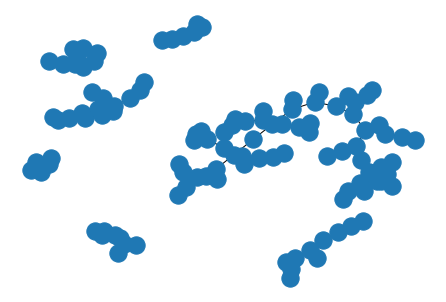

In [82]:
print("Best fitness was %f" % best_fitness_football)
new_G = nx.Graph()

for i in range(len(best_chromosome_football)):
    new_G.add_edge(i, best_chromosome_football[i])
plt.figure()
nx.draw(new_G)

In [89]:
best_fitness_dolphins = 0
for pc in np.linspace(0.7, 0.9, 3):
    for pm in [0.1, 0.2]:
        for x in range(1,4):
            fitn,  chromosome = genetic_algorithm(dolphins, x, pc, pm)
            print("Crossover Probablity: %f, Mutation Probability: %f Elitism: %d, Fitness: %f" % (pc, pm, x, fitn))
            if best_fitness_dolphins < fitn:
                best_chromosome_dolphins = chromosome
                best_fitness_dolphins = fitn         

Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 37.096382
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 36.092192
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 33.604695
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 32.377601
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 2, Fitness: 29.538800
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 3, Fitness: 31.638341
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 35.612401
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 35.556756
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 34.874675
Crossover Probablity: 0.800000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 31.848566
Crossover Probablity: 0.800000, Mutation Probability: 0.2000

Best fitness was 37.096382


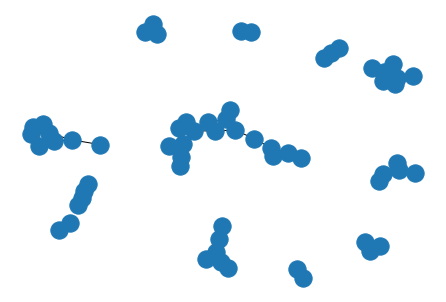

In [90]:
print("Best fitness was %f" % best_fitness_dolphins)

new_G = nx.Graph()

for i in range(len(best_chromosome_dolphins)):
    new_G.add_edge(i, best_chromosome_dolphins[i])
plt.figure()
nx.draw(new_G)

In [93]:
best_fitness_lesmis = 0
for pc in np.linspace(0.7, 0.9, 3):
    for pm in [0.1, 0.2]:
        for x in range(1,4):
            fitn,  chromosome = genetic_algorithm(lesmis, x, pc, pm)
            print("Crossover Probablity: %f, Mutation Probability: %f Elitism: %d, Fitness: %f" % (pc, pm, x, fitn))
            if best_fitness_lesmis < fitn:
                best_chromosome_lesmis = chromosome
                best_fitness_lesmis = fitn

Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 161.906513
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 148.299685
Crossover Probablity: 0.700000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 152.490010
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 156.978009
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 2, Fitness: 144.522724
Crossover Probablity: 0.700000, Mutation Probability: 0.200000 Elitism: 3, Fitness: 154.124011
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 1, Fitness: 162.837684
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 2, Fitness: 167.371661
Crossover Probablity: 0.800000, Mutation Probability: 0.100000 Elitism: 3, Fitness: 142.793273
Crossover Probablity: 0.800000, Mutation Probability: 0.200000 Elitism: 1, Fitness: 143.727747
Crossover Probablity: 0.800000, Mutation Probabili

Best fitness was 163.857523


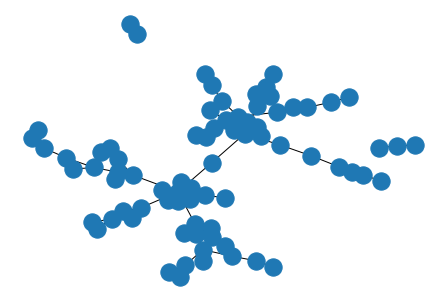

In [39]:
print("Best fitness was %f" % best_fitness_lesmis)
       
new_G = nx.Graph()

for i in range(len(best_chromosome_lesmis)):
    new_G.add_edge(i, best_chromosome_lesmis[i])
plt.figure()
nx.draw(new_G)

Το modularity υπολογίζεται ως $$Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_ik_j}{2m}\right) \delta(c_i,c_j)$$

where $m$ is the number of edges, $A$ is the adjacency matrix of
    `G`, $k_i$ is the degree of $i$ and $\delta(c_i, c_j)$
    is 1 if $i$ and $j$ are in the same community and 0 otherwise.

In [41]:
# modularity for GA community detection algorithm 
def compute_modularity(G,G_results):
    new_G = nx.Graph()
    
    for i in range(len(G_results)):
        new_G.add_edge(i, G_results[i])
        
    k = nx.number_connected_components(new_G) # number of connected components
    partitioning = tuple(nx.connected_components(new_G)) # connected components
    
    mod = nx.algorithms.community.quality.performance(G, partitioning)
    return mod, k

In [94]:
football_ga_mod, football_k = compute_modularity(football, best_chromosome_football)
dolphins_ga_mod, dolphins_k = compute_modularity(dolphins, best_chromosome_dolphins)
lesmis_ga_mod, lesmis_k = compute_modularity(lesmis, best_chromosome_lesmis)

#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου ανάλογα με τις τιμές των παραμέτρων

Παρατηρούμε ότι το μεγάλο Elitism ($3$), καθώς $0.8$ crossover rate με ψηλό $0.2$ mutation rate, τείνουν να μας δώσουν καλύτερα αποτελέσματα. Ακόμα, για κάποιο λόγο, με Elitism $2$ χρομοσωμάτων παίρνουμε συνήθως χειρότερα αποτελέσματα από ότι με Elitism 1.

### Find the best partition with Girvan-Newman, Spectral Clustering and Modularity Maximization
<p style=text-align:justify>Aποτέλεσματα των αλγορίθμων της δεύτερης εργαστηριακής άσκησης (με προτεινόμενη υλοποίηση).</p>

In [44]:
import itertools

# Girvan_newman:partitions of at most k communities, select the one with the highest value of modularity.
def comd_GN(G,k):
    gn_G = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, gn_G)
    per_G = []
    com_G = []
    for communities in limited:
        per = nx.algorithms.community.quality.performance(G,communities)
        per_G.append(per) #list of performance of each partition
        com_G.append(communities) # list of partitions
    max_mod_G = max(per_G) # maximum modularity value
    index_G = per_G.index(max(per_G)) # index of maximum modularity
    best_G = com_G[index_G] # the partition of maximum modularity  
    num_best_G = len(best_G)
    return best_G, max_mod_G, num_best_G

GN_best_football, GN_mod_football, GN_num_football = comd_GN(football,50)
GN_best_lesmis, GN_mod_lesmis, GN_num_lesmis = comd_GN(lesmis,50)
GN_best_dolphins, GN_mod_dolphins, GN_num_dolphins = comd_GN(dolphins,50)

In [45]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
def comd_SP(G,k):
    mG = np.array(nx.to_numpy_matrix(G))
    clustering = SpectralClustering(n_clusters=k,random_state=0, affinity='precomputed').fit(mG)
    clabels = clustering.labels_
    numc = clustering.n_clusters
    b = dict(enumerate(clabels,0)) # create a mapping of nodes indices to the community it belongs
    d = [] # a list of all communities (each list is a community)
    for i in range(0,numc):
        d.append([k for k,v in b.items() if float(v) == i])
    per = nx.algorithms.community.quality.performance(G,d)
    return d, per, numc

def find_best_SP_partition(G,k):
    com = []
    com_mod = []
    com_num = []
    for i in range(2,k):
        tcom,tcom_mod,tcom_num = comd_SP(G,i)
        com.append(tcom)
        com_mod.append(tcom_mod)
        com_num.append(tcom_num)
    index = com_mod.index(max(com_mod))
    G_SP = com[index]
    G_SP_mod = com_mod[index]
    G_SP_num = com_num[index]
    return G_SP, G_SP_mod, G_SP_num

football_SP, football_SP_mod, football_SP_num = find_best_SP_partition(football,50) 
lesmis_SP, lesmis_SP_mod, lesmis_SP_num = find_best_SP_partition(lesmis,50)  
dolphins_SP, dolphins_SP_mod, dolphins_SP_num = find_best_SP_partition(dolphins,50)

In [46]:
# Modularity Maximization
def comd_MM(G):
    c = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    mm_G = []
    for i,j in enumerate(c):
        a = list(j)
        mm_G.append(a)
    per = nx.algorithms.community.quality.performance(G,mm_G)
    num_G = len(mm_G)
    return mm_G, per,num_G

football_MM, football_MM_mod, football_MM_num = comd_MM(football)
lesmis_MM, lesmis_MM_mod, lesmis_MM_num = comd_MM(lesmis)  
dolphins_MM, dolphins_MM_mod, dolphins_MM_num = comd_MM(dolphins)

### Compare best modularity scores for all algorithms

In [95]:
# Compare results 
print ("American College Football")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_football, GN_mod_football))
print ("Spectral Clustering: %r communities with modularity score %r" %(football_SP_num, football_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(football_MM_num, football_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(football_k, football_ga_mod))
print()
print ("Les Miserables")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_lesmis, GN_mod_lesmis))
print ("Spectral Clustering: %r communities with modularity score %r" %(lesmis_SP_num, lesmis_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(lesmis_MM_num, lesmis_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r"%(lesmis_k, lesmis_ga_mod))
print()
print ("Dolphins")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_dolphins, GN_mod_dolphins))
print ("Spectral Clustering: %r communities with modularity score %r" %(dolphins_SP_num, dolphins_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(dolphins_MM_num, dolphins_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(dolphins_k, dolphins_ga_mod))

American College Football
Girvan-Newman: 17 communities with modularity score 0.9581998474446987
Spectral Clustering: 15 communities with modularity score 0.9581998474446987
Modularity Maximization: 6 communities with modularity score 0.8681922196796339
Genetic Algorithm: 10 communities with modularity score 0.882837528604119

Les Miserables
Girvan-Newman: 32 communities with modularity score 0.9630895420369104
Spectral Clustering: 24 communities with modularity score 0.9504442925495558
Modularity Maximization: 5 communities with modularity score 0.815105946684894
Genetic Algorithm: 13 communities with modularity score 0.9237867395762133

Dolphins
Girvan-Newman: 27 communities with modularity score 0.9439450026441036
Spectral Clustering: 21 communities with modularity score 0.9413008989952406
Modularity Maximization: 4 communities with modularity score 0.7424643046007403
Genetic Algorithm: 12 communities with modularity score 0.8873611845584347


#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου συγκριτικά με τους άλλους

Τα αποτελέσματα που παίρνουμε είναι αρκετά κοντά στα αναμενόμενα. Σύμφωνα με το paper, τα αποτελέσματα που παίρνουμε από τον γενετικό αλγόριθμο είναι τουλάχιστον ισάξια με την μέθοδο Grivan-Newman. Αυτή η μικρή διαφορά μπορεί να συμβαίνει λόγω του μικρού Elitism (μέγιστο 1%, ενώ στο paper χρησιμοποιούσαν 10%) ή και σε κάποιο σφάλμα στον γενετικό μας αλγόριθμο. 